# 2019 Fordgobike Dataset Exploration and Visualization
## by Mahmoud Osama


## Investigation Overview

> We will investigate **Ford GoBike System Dataset** and discuss the effect of Three variables ('user_type','Trip_day of the week',and 'duration_min') on number of trips and the relation between them.

## Dataset Overview

>**Ford GoBike System Dataset**  includes information about individual rides made
in a bike-sharing system covering the greater San Francisco Bay area for Feb 2019.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

## Data Gathering
> We will load our dataset and describe its properties.

In [3]:
# Load my data and print out a few lines. 
df = pd.read_csv('201902-fordgobike-tripdata.csv')
fordgobike_df = df.copy() # Taking a copy of the dataframe
fordgobike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


**We will replace Null values in the following columns with 'No data provided'** : start_station_id , start_station_name , end_station_id, end_station_name, member_gender.
**We will replace Null values in the following columns with '0'** : member_birth_year.

In [4]:
fordgobike_df['start_station_id'].fillna('No data provided', inplace = True)
fordgobike_df['start_station_name'].fillna('No data provided', inplace = True)
fordgobike_df['end_station_id'].fillna('No data provided', inplace = True)
fordgobike_df['end_station_name'].fillna('No data provided', inplace = True)
fordgobike_df['member_gender'].fillna('No data provided', inplace = True)
fordgobike_df['member_birth_year'].fillna('0', inplace = True)

### Adjusting the datatypes for some variables and enhancing data structure by making new columns

In [5]:
# adjusting start_time data type to date
fordgobike_df['start_time'] =pd.to_datetime(fordgobike_df['start_time'])
# adjusting end_time data type to date
fordgobike_df['end_time'] =pd.to_datetime(fordgobike_df['end_time'])
# adjusting some columns data type to string
fordgobike_df['start_station_id'] = fordgobike_df['start_station_id'].astype('str')
fordgobike_df['end_station_id'] = fordgobike_df['end_station_id'].astype('str')
fordgobike_df['start_station_name'] = fordgobike_df['start_station_name'].astype('str')
fordgobike_df['end_station_name'] = fordgobike_df['end_station_name'].astype('str')
fordgobike_df['member_birth_year'] = fordgobike_df['member_birth_year'].astype('int')
# adjusting user_type, member_gender data type to Category
fordgobike_df['user_type'] = fordgobike_df['user_type'].astype('category')
fordgobike_df['member_gender'] = fordgobike_df['member_gender'].astype('category')
# Create a new column contains the trip duration in mins
fordgobike_df['duration_min']= fordgobike_df['duration_sec']/60
# Create a new column contains User age
fordgobike_df['user_age']= 2019- fordgobike_df['member_birth_year'] 
# Making separate columns for Hour and Day
fordgobike_df['start_date']= fordgobike_df.start_time.dt.strftime("%m/%d/%y")
fordgobike_df['Trip_day of the week'] = fordgobike_df.start_time.dt.strftime('%A')
fordgobike_df['Trip_hour of the day'] = fordgobike_df.start_time.dt.strftime('%H')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (User Type and their Weekdays Usage)

>Most users are Subscribers
> Subscribers have the lowest number of trips in the weekend holiday (Saturday and Sunday) while Customers have the lowest number of trips on Wednesday and have realtively better numbers of trips in the weekend holiday (Saturday and Sunday).



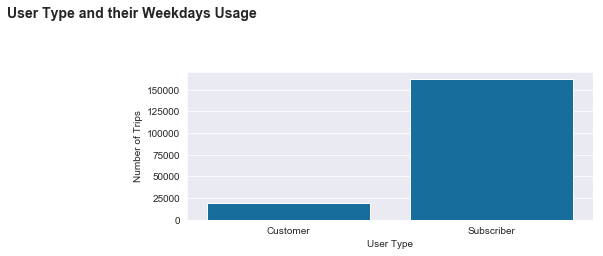

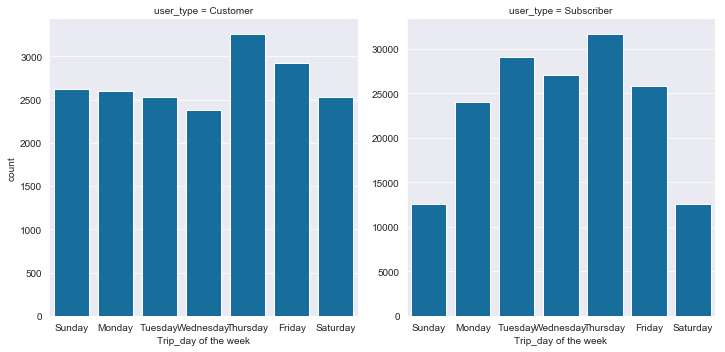

In [9]:
#setting up base color and Style
base_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid');
fig, ax = plt.subplots(figsize = [16,6]);
plt.suptitle('User Type and their Weekdays Usage', fontsize=14, fontweight='semibold', y=1.03);
#Exploring user_type variable in terms of number of trips
plt.subplot(2, 2, 2);
sb.countplot(data= fordgobike_df,x='user_type', color= base_color);
plt.xlabel('User Type');
plt.ylabel('Number of Trips');
plt.subplot(2, 2, 2);
weekday_order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
sb.catplot(data=fordgobike_df, x='Trip_day of the week', col="user_type", order = weekday_order, kind='count', 
           sharey = False, color = base_color);

In [12]:
# we will filter out the outliers in duration_min so, we can make our Bivariate plots easily
fordgobike_df = fordgobike_df.query('duration_min <= 60')
fordgobike_df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181702 entries, 4 to 183411
Data columns (total 21 columns):
duration_sec               181702 non-null int64
start_time                 181702 non-null datetime64[ns]
end_time                   181702 non-null datetime64[ns]
start_station_id           181702 non-null object
start_station_name         181702 non-null object
start_station_latitude     181702 non-null float64
start_station_longitude    181702 non-null float64
end_station_id             181702 non-null object
end_station_name           181702 non-null object
end_station_latitude       181702 non-null float64
end_station_longitude      181702 non-null float64
bike_id                    181702 non-null int64
user_type                  181702 non-null category
member_birth_year          181702 non-null int32
member_gender              181702 non-null category
bike_share_for_all_trip    181702 non-null object
duration_min               181702 non-null float64
user_age         

## ( User Type and their Trips Duration)

> Most of trips are taking less than 15 mins and the top number of the trips takes about 10 mins.

> Subscribers have narrower trip duration than Customers.

> Subscibers have more specific Trips than casual Customers.

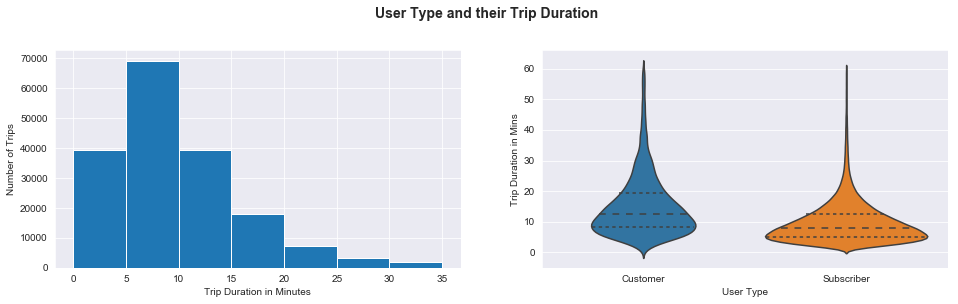

In [13]:
fig, ax = plt.subplots(figsize = [16,4]);
plt.suptitle('User Type and their Trip Duration', fontsize=14, fontweight='semibold', y=1.03);
plt.subplot(1, 2, 1);
#Exploring trip duration variable in terms of number of trips
bins = np.arange(0, 40, 5);
plt.hist(data = fordgobike_df, x = 'duration_min', bins = bins);
plt.xlabel('Trip Duration in Minutes');
plt.ylabel('Number of Trips');
plt.subplot(1, 2, 2);
#Exploring User Type variable in terms of trip duration 
sb.violinplot(data=fordgobike_df, x='user_type', y='duration_min', inner='quartile',scale="area");
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Mins');

## (Trips Duration in Week days per User type)

> Subscribers tends to rent bikes on working days while Customers tends to rent more in the weekend holiday (Saturday and Sunday) for longer duration.

> Subscribers rent bikes more efficiently as they have a shorter trip duration overall than customers.

> Both of Users type have a longer trip duration on weekend in relative to their trips during other week days.

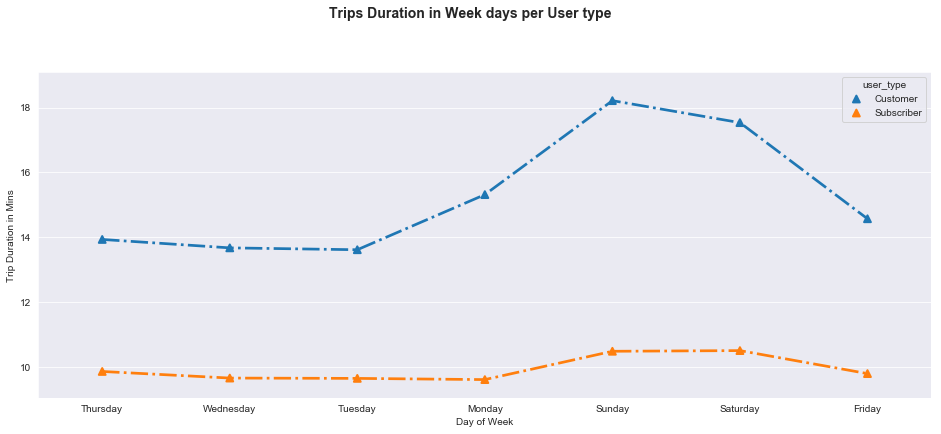

In [14]:
plt.figure(figsize=[16, 6]);
plt.suptitle('Trips Duration in Week days per User type', fontsize=14, fontweight='semibold', y=1.03)
sb.pointplot(data=fordgobike_df, x='Trip_day of the week', y='duration_min', hue='user_type', errwidth=0, linestyles='-.'
             ,markers = '^');
plt.xlabel('Day of Week');
plt.ylabel('Trip Duration in Mins');